# **AIRLINE ASSIGNMENT** | ANALYSING DISTRIBUTIONS

### **1. INTRODUCTION**

This project will invetigate several histograms and density plots in Python using the matplotlib and seaborn libraries. Throughout, we will explore a real-world dataset because with the wealth of sources available online, there is no excuse for not using actual data! We will visualize the NYCflights13 data, which contains over 300,000 observations of flights departing NYC in 2013. We will focus on displaying a single variable, the arrival delay of flights in minutes.

### **2. READ DATA**

It’s always a good idea to examine our data before we get started plotting. We can read the data into a pandas dataframe and display the first 10 rows:

In [81]:
# import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns

In [51]:
# read data from file
flights = pd.read_csv('./data/formatted_flights.csv', usecols=['arr_delay', 'name'])

### **3. EXPLORE DATA**

The flight arrival delays are in minutes and negative values mean the flight was early (it turns out flights often tend to arrive early, just never when we’re on them!) There are over 300,000 flights with a minimum delay of -60 minutes and a maximum delay of 120 minutes. The other column in the dataframe is the name of the airline which we can use for comparisons.

In [52]:
# show first five rows of data
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


In [53]:
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distributio
flights.describe()

,arr_delay
count,317113.000000
mean,1.297143
std,29.064401
min,-60.000000
25%,-17.000000
50%,-6.000000
75%,11.000000
max,120.000000


In [54]:
# Print a concise summary of a DataFrame.
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317113 entries, 0 to 317112
Data columns (total 2 columns):
arr_delay    317113 non-null float64
name         317113 non-null object
dtypes: float64(1), object(1)
memory usage: 4.8+ MB


In [55]:
# check missing values
flights.isnull().sum()

arr_delay    0
name         0
dtype: int64

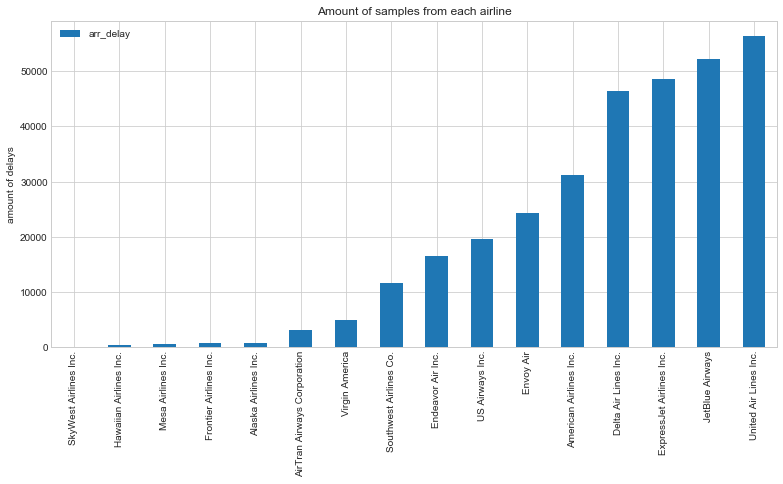

In [106]:
# group number of delays by name of airlines
ax = flights.groupby('name').count().sort_values('arr_delay').plot(kind='bar')
ax.set_ylabel('amount of delays')
ax.set_xlabel('')
ax.set_title('Amount of samples from each airline')
plt.rcParams["figure.figsize"] = (13,6)

### **4. HISTOGRAMS**

A great way to get started exploring a single variable is with the histogram. A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis. In our case, the bins will be an interval of time representing the delay of the flights and the count will be the number of flights falling into that interval. The binwidth is the most important parameter for a histogram and we should always try out a few different values of binwidth to select the best one for our data.

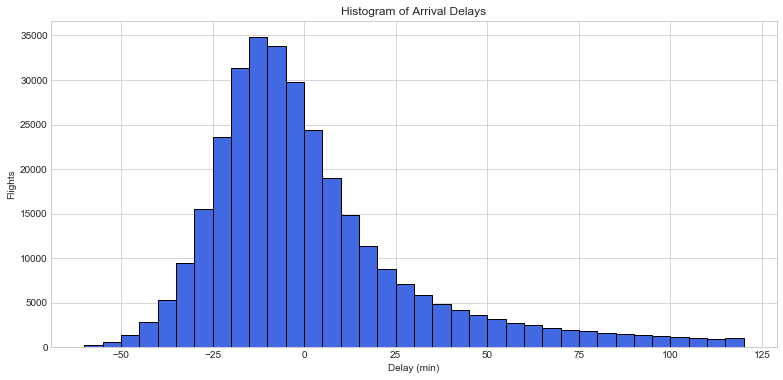

In [111]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(flights['arr_delay'], color = 'royalblue', edgecolor = 'black', bins = int(180/5))

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')
plt.rcParams["figure.figsize"] = (13,6)

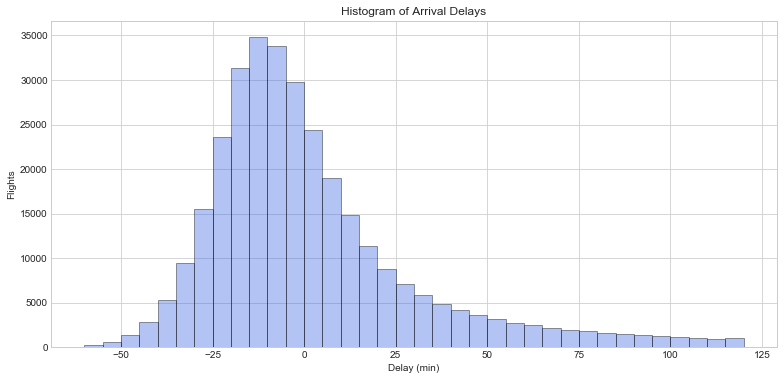

In [110]:
# seaborn histogram
sns.distplot(flights['arr_delay'], hist=True, kde=False, bins=int(180/5), color = 'royalblue', hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')
plt.rcParams["figure.figsize"] = (13,6)

How did I come up with 5 minutes for the binwidth? The only way to figure out an optimal binwidth is to try out multiple values! Below is code to make the same figure in matplotlib with a range of binwidths. Ultimately, there is no right or wrong answer to the binwidth, but I choose 5 minutes because I think it best represents the distribution.

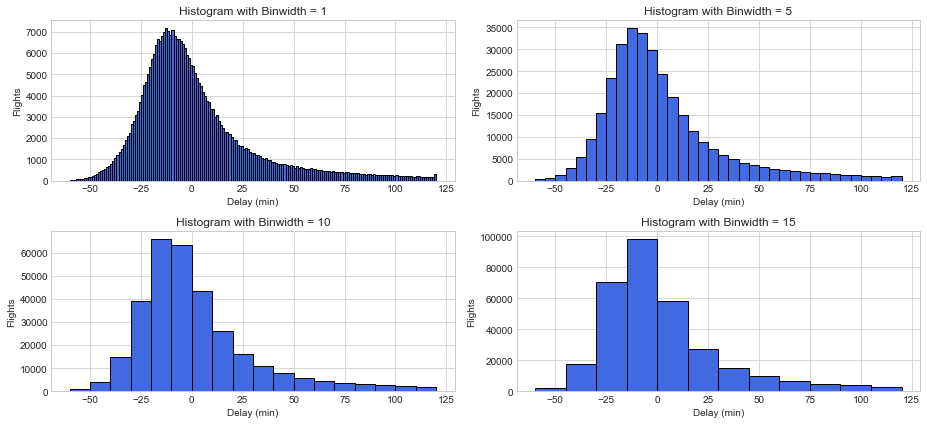

In [115]:
# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'royalblue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 12)
    ax.set_xlabel('Delay (min)', size = 10)
    ax.set_ylabel('Flights', size= 10)

plt.tight_layout()
plt.show()
plt.rcParams["figure.figsize"] = (13,6)

The choice of binwidth significantly affects the resulting plot. Smaller binwidths can make the plot cluttered, but larger binwidths may obscure nuances in the data. Matplotlib will automatically choose a reasonable binwidth for you, but I like to specify the binwidth myself after trying out several values. There is no true right or wrong answer, so try a few options and see which works best for your particular data.

### **5. WHEN HISTOGRAMS FAIL**

if we want to compare arrival delay distributions between airlines, an approach that doesn’t work well is to to create histograms for each airline on the same plot:

In [132]:
# Extract top five airlines with most flights
carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]

# Subset to the top 5 airlines
top_five_flights = flights[flights['name'].isin(top_five)]

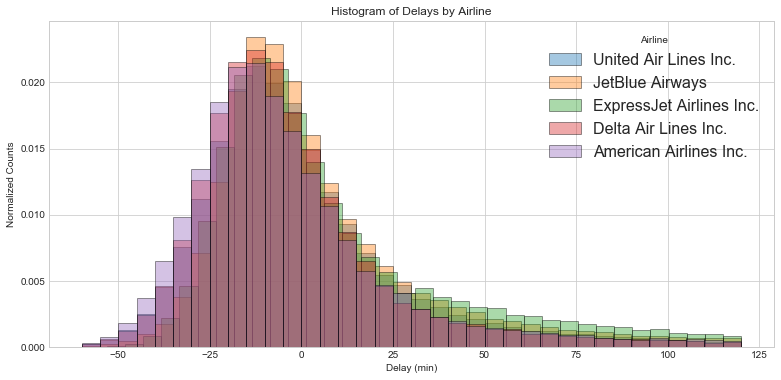

In [116]:
# Iterate through each of the five airlines
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['name'] == airline]
    # Make a histogram with the airline
    sns.distplot(subset['arr_delay'], bins = int(180/5), 
                 label = airline, hist = True, kde = False, 
                 norm_hist=True, 
                 hist_kws = {'edgecolor': 'black'})
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Histogram of Delays by Airline'); plt.xlabel('Delay (min)'); plt.ylabel('Normalized Counts');
plt.rcParams["figure.figsize"] = (13,6)

In [117]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

#### 5.1 SOLUTION 1: Side-by-side Histograms

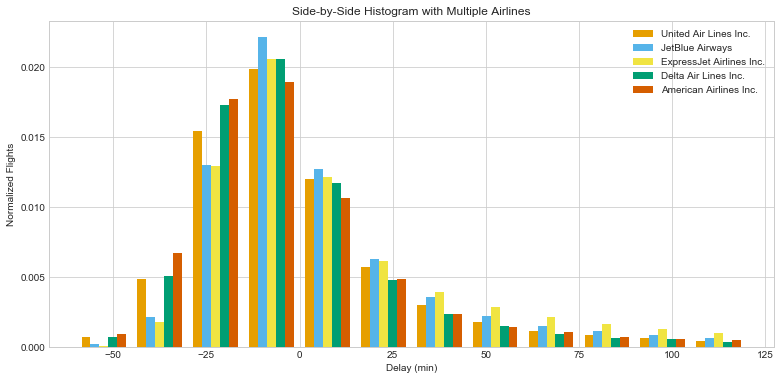

In [125]:
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines');
plt.rcParams["figure.figsize"] = (13,6)

#### 5.2 SOLUTION 2: Stacked Histograms

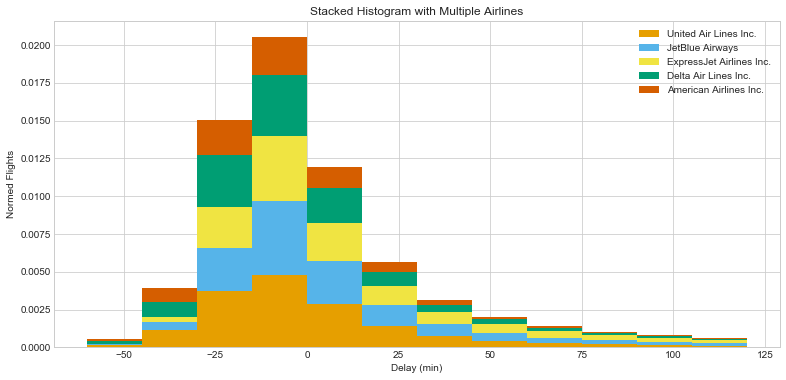

In [124]:
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, stacked=True, color = colors, label=names)

plt.legend(); plt.xlabel('Delay (min)'); plt.ylabel('Normed Flights');
plt.title('Stacked Histogram with Multiple Airlines');
plt.rcParams["figure.figsize"] = (13,6)

### **6. DENSITY PLOTS**

A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point).

The x-axis is the value of the variable just like in a histogram, but what exactly does the y-axis represent? The y-axis in a density plot is the probability density function for the kernel density estimation. However, we need to be careful to specify this is a probability density and not a probability. The difference is the probability density is the probability per unit on the x-axis. To convert to an actual probability, we need to find the area under the curve for a specific interval on the x-axis. Somewhat confusingly, because this is a probability density and not a probability, the y-axis can take values greater than one. The only requirement of the density plot is that the total area under the curve integrates to one. I generally tend to think of the y-axis on a density plot as a value only for relative comparisons between different categories.

#### 6.1 Density Plot of All Delays

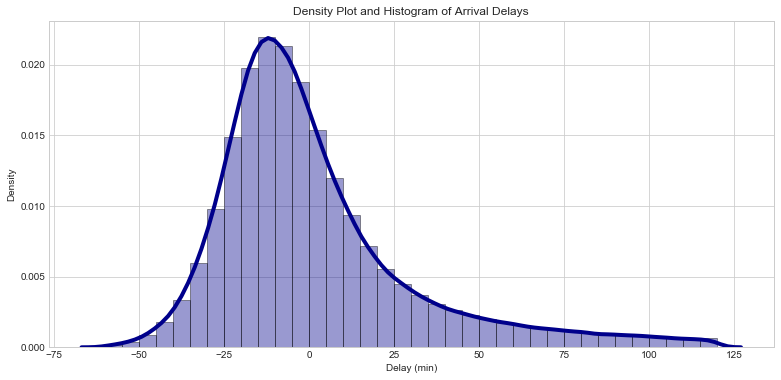

In [126]:
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

plt.title('Density Plot and Histogram of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');
plt.rcParams["figure.figsize"] = (13,6)

#### 6.2 Density Plot with Varying Bandwidths

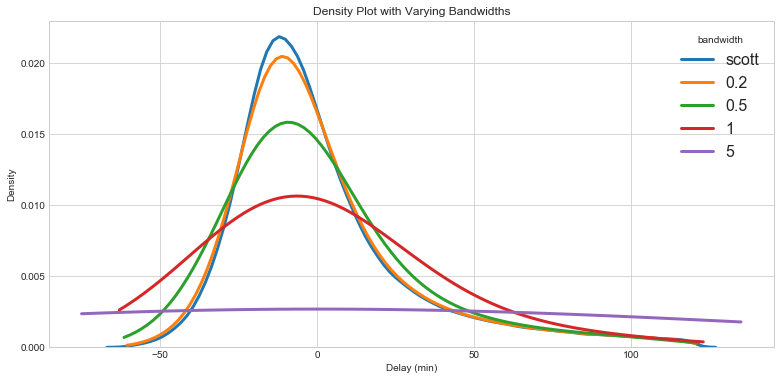

In [127]:
for bandwidth in ['scott', 0.2, 0.5, 1, 5]:
    sns.distplot(flights['arr_delay'], hist = False, kde = True, 
                 kde_kws={'bw': bandwidth, 'linewidth': 3},
                 label = bandwidth)
    
plt.legend(prop={'size': 16}, title = 'bandwidth')
plt.title('Density Plot with Varying Bandwidths'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');
plt.rcParams["figure.figsize"] = (13,6)

#### 6.3 Density Plot of Delays of Top Five

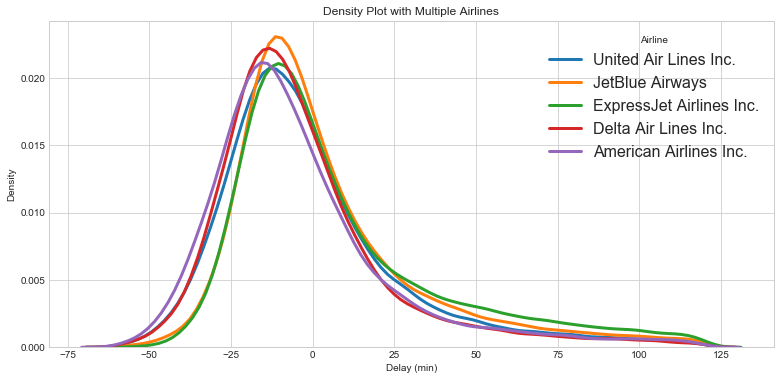

In [129]:
# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the top five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines'); 
plt.xlabel('Delay (min)')
plt.ylabel('Density');
plt.rcParams["figure.figsize"] = (13,6)

#### 6.4 Shaded Density Plot

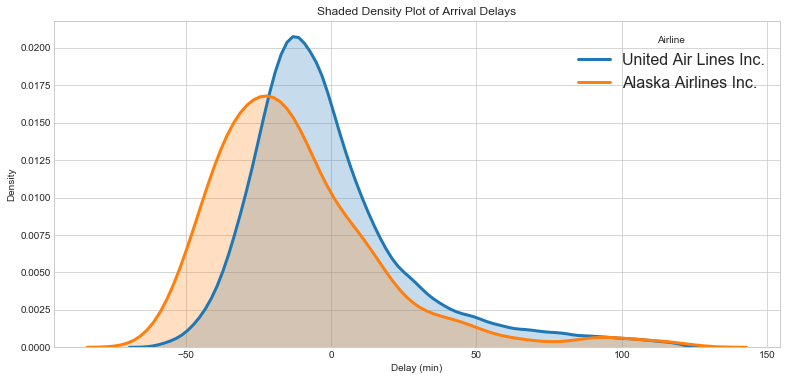

In [130]:
for airline in ['United Air Lines Inc.', 'Alaska Airlines Inc.']:
    subset = flights[flights['name'] == airline]
    
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');
plt.rcParams["figure.figsize"] = (13,6)

#### 6.5 Density with Rug Plot

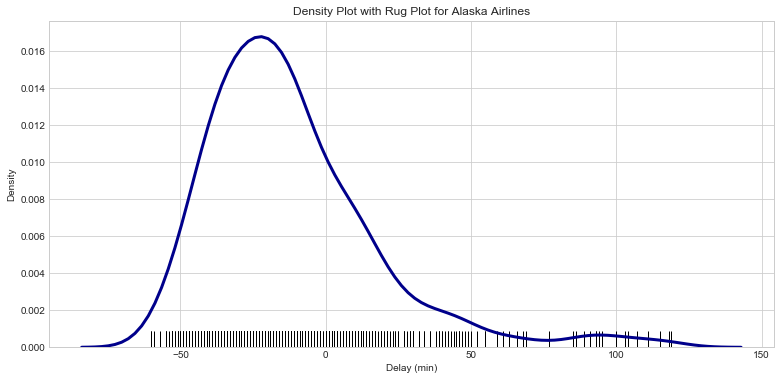

In [131]:
# Subset to Alaska Airlines
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines');
plt.xlabel('Delay (min)'); plt.ylabel('Density');
plt.rcParams["figure.figsize"] = (13,6)

### ADDITIONAL MATERIALS
- [Tutorial: Histograms and Density Plots in Python](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
- [Data Visalization book](https://serialmentor.com/dataviz/)